In [1]:
import pandas as pd 
import uunet.multinet as ml
from utils import *


n_cop = '26'
folder = '/Users/alessiogandelli/data/cop' + str(n_cop) + '/'

projected_path = folder + 'networks/cop' + str(n_cop) +'_retweet_network_ml.gml'
mln = ml.read(projected_path)   # multilayer network
layers = ml.to_nx_dict(mln) # dictionary where we have a networkx graph for each layer
layers = {int(float(k)): v for k, v in layers.items()} # key float to int

In [6]:
#res = get_polarization_by_layer(layers, n_influencers = 100, n = 2)

users_df = pd.DataFrame(columns=['target'])
influencers_df = pd.DataFrame(columns=['source'])



for topic, r in res.items():

    r[1]['topic'] = topic
    r[2]['topic'] = topic

    r[1].rename(columns={'user':'target'}, inplace=True)
    r[2].rename(columns={'user':'source'}, inplace=True)

    users_df = pd.concat([users_df, r[1]], ignore_index=True)
    influencers_df = pd.concat([influencers_df, r[2]], ignore_index=True)


pivot_df = users_df.pivot(index='target', columns='topic', values='score')
inf_df = influencers_df.pivot(index='source', columns='topic', values='score')

pivot_df['avg_score'] = pivot_df.mean(axis=1, numeric_only=True)
pivot_df['n_topics'] = pivot_df.count(axis=1) -1 # exclude avg score
pivot_df['std_score'] = pivot_df.drop(columns=['n_topics', 'avg_score']).std(axis=1)
pivot_df['team'] = pivot_df['avg_score'].apply(lambda x: 1 if x > 0 else -1)

inf_df['avg_score'] = inf_df.mean(axis=1, numeric_only=True)
inf_df['n_topics'] = inf_df.count(axis=1) -1 # exclude avg score
inf_df['std_score'] = inf_df.drop(columns=['n_topics', 'avg_score']).std(axis=1)
inf_df['team'] = inf_df['avg_score'].apply(lambda x: 1 if x > 0 else -1)

In [7]:

mono_topic_users = pivot_df[pivot_df['n_topics'] == 1]
poli_topic_users = pivot_df[pivot_df['n_topics'] > 1]

/var/folders/3d/gwpjk7bs72x11tjz__t3mmqr0000gn/T/ipykernel_28048/3765485820.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mono_topic_users['avg_score'], label='monotopic users')
/var/folders/3d/gwpjk7bs72x11tjz__t3mmqr0000gn/T/ipykernel_28048/3765485820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


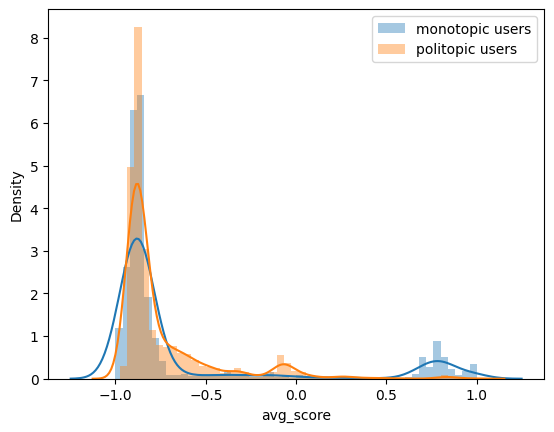

In [38]:
pivot_df['type'] = pivot_df['n_topics'].apply(lambda x: 'mono' if x == 1 else 'poli')

# visuzlize avg score of mono topic users and poli topic users

sns.distplot(mono_topic_users['avg_score'], label='monotopic users')
sns.distplot(poli_topic_users['avg_score'], label='politopic users')
plt.legend()
plt.show()

In [10]:
# spot differences between mono and poli topic users
mono_topic_users['avg_score'].describe()
poli_topic_users['avg_score'].describe()


count    5971.000000
mean       -0.737295
std         0.288619
min        -0.974158
25%        -0.890460
50%        -0.861530
75%        -0.713311
max         1.000000
Name: avg_score, dtype: float64

In [18]:
# count the positive topic for each user
poli_topic_users['n_positive_topics'] = poli_topic_users.drop(columns=['n_topics', 'avg_score', 'std_score', 'team']).apply(lambda x: x[x > 0].count(), axis=1)
poli_topic_users['n_negative_topics'] = poli_topic_users.drop(columns=['n_topics', 'avg_score', 'std_score', 'team']).apply(lambda x: x[x < 0].count(), axis=1)

/var/folders/3d/gwpjk7bs72x11tjz__t3mmqr0000gn/T/ipykernel_28048/2635140126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poli_topic_users['n_positive_topics'] = poli_topic_users.drop(columns=['n_topics', 'avg_score', 'std_score', 'team']).apply(lambda x: x[x > 0].count(), axis=1)
/var/folders/3d/gwpjk7bs72x11tjz__t3mmqr0000gn/T/ipykernel_28048/2635140126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poli_topic_users['n_negative_topics'] = poli_topic_users.drop(columns=['n_topics', 'avg_score', 

In [37]:
# get team 1
team1 = poli_topic_users[poli_topic_users['team'] == 1]
# count the users with more than 1 negative topic
len(team1[team1['n_negative_topics'] > 0])
len(team1[team1['n_negative_topics'] > 0]) / len(team1)

# positive on negative topics
(team1['n_negative_topics'] / team1['n_positive_topics']).describe()

count    181.000000
mean       0.534991
std        0.437096
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        2.000000
dtype: float64

In [36]:
team_minus1 = poli_topic_users[poli_topic_users['team'] == -1]
# count the users with more than 1 positive topic
len(team_minus1[team_minus1['n_positive_topics'] > 0])
len(team_minus1[team_minus1['n_positive_topics'] > 0]) / len(team_minus1)

(team_minus1['n_positive_topics'] / team_minus1['n_negative_topics']).describe()


count    5790.000000
mean        0.083311
std         0.252896
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
dtype: float64

In [30]:
team_minus1

topic,0.0,1.0,3.0,4.0,6.0,7.0,8.0,10.0,11.0,12.0,...,60.0,61.0,67.0,68.0,avg_score,n_topics,std_score,team,n_positive_topics,n_negative_topics
target,,,,,,,,,,,,,,,,,,,,,
1000002715999784961,NaN,NaN,-0.951640,NaN,NaN,NaN,NaN,NaN,-0.906640,NaN,...,NaN,NaN,NaN,NaN,-0.929140,2,0.031820,-1,0,2
1000242837852688385,NaN,NaN,NaN,NaN,NaN,NaN,-0.938574,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.907959,2,0.043296,-1,0,2
100032683,NaN,0.144837,-0.932874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.394019,2,0.762057,-1,1,1
1001178326646521862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.908495,NaN,...,NaN,NaN,NaN,NaN,-0.854262,2,0.076697,-1,0,2
1001552492138762240,-0.839394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.902840,NaN,...,NaN,NaN,NaN,NaN,-0.876191,3,0.032918,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998171318,NaN,NaN,NaN,NaN,NaN,NaN,-0.934523,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.850384,3,0.105156,-1,0,3
999441404,-0.868291,NaN,-0.952178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.910235,2,0.059317,-1,0,2
999735281090777089,NaN,NaN,-0.952392,NaN,NaN,NaN,NaN,NaN,-0.904123,NaN,...,NaN,NaN,NaN,NaN,-0.913916,3,0.034634,-1,0,3


In [41]:
pivot_df['n_topics'].value_counts()

n_topics
1     16153
2      3378
3      1253
4       624
5       309
6       166
7       100
8        55
9        28
11       16
10       13
12       11
13        4
16        3
22        2
17        2
23        2
14        2
20        1
15        1
18        1
Name: count, dtype: int64

In [44]:
poli_topic_users

topic,0.0,1.0,3.0,4.0,6.0,7.0,8.0,10.0,11.0,12.0,...,60.0,61.0,67.0,68.0,avg_score,n_topics,std_score,team,n_positive_topics,n_negative_topics
target,,,,,,,,,,,,,,,,,,,,,
1000002715999784961,NaN,NaN,-0.951640,NaN,NaN,NaN,NaN,NaN,-0.906640,NaN,...,NaN,NaN,NaN,NaN,-0.929140,2,0.031820,-1,0,2
1000242837852688385,NaN,NaN,NaN,NaN,NaN,NaN,-0.938574,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.907959,2,0.043296,-1,0,2
100032683,NaN,0.144837,-0.932874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.394019,2,0.762057,-1,1,1
1001178326646521862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.908495,NaN,...,NaN,NaN,NaN,NaN,-0.854262,2,0.076697,-1,0,2
1001552492138762240,-0.839394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.902840,NaN,...,NaN,NaN,NaN,NaN,-0.876191,3,0.032918,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998171318,NaN,NaN,NaN,NaN,NaN,NaN,-0.934523,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.850384,3,0.105156,-1,0,3
999441404,-0.868291,NaN,-0.952178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.910235,2,0.059317,-1,0,2
999735281090777089,NaN,NaN,-0.952392,NaN,NaN,NaN,NaN,NaN,-0.904123,NaN,...,NaN,NaN,NaN,NaN,-0.913916,3,0.034634,-1,0,3


In [62]:
pol = pivot_df.drop(columns=['n_topics', 'avg_score', 'std_score', 'team', 'type']).abs()

# make positive all the negative values
pol.abs()

pol['avg_score'] = pol.mean(axis=1, numeric_only=True)
pol['n_topics'] = pol.count(axis=1) -1 # exclude avg score

pol['mono'] = pol['n_topics'].apply(lambda x: 'mono' if x == 1 else 'poli')   

# confusion matrix  mono e avg_score
pol.groupby(['mono']).agg({'avg_score': ['mean', 'std', 'count']})



topic avg_score                 
           mean       std  count
mono                            
mono   0.831619  0.159811  16153
poli   0.824285  0.110490   5971

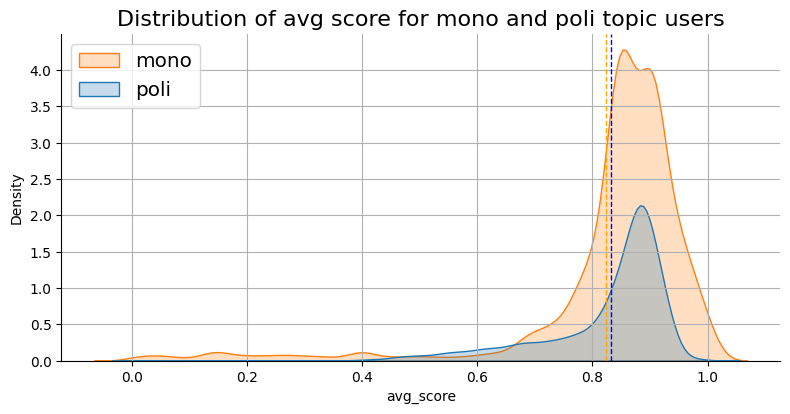

In [100]:
# these two plots together using seaborn
sns.displot(pol, x="avg_score", hue="mono", kind="kde", fill=True, legend=False,  height=4, aspect=2)
# show mean 


# add grid 
plt.grid()
# legend inside the plot


plt.axvline(pol[pol['mono'] == 'mono']['avg_score'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(pol[pol['mono'] == 'poli']['avg_score'].mean(), color='orange', linestyle='dashed', linewidth=1)

plt.legend(["mono", "poli"], fontsize="x-large", loc='upper left')

plt.title('Distribution of avg score for mono and poli topic users', fontsize=16)

plt.show()


In [111]:
# correlation between team and type in pivot_df
pivot_df.groupby(['team', 'type']).agg({'avg_score': ['mean', 'std', 'count']}).round(2)

#sns.displot(pivot_df, x="avg_score", hue="team", kind="kde", fill=True, legend=False,  height=4, aspect=2)

topic     avg_score             
               mean   std  count
team type                       
-1   mono     -0.85  0.15  13894
     poli     -0.77  0.21   5790
 1   mono      0.75  0.21   2259
     poli      0.33  0.31    181